# <font face="微软雅黑"><font color=#FF000 >Introduce SVC Algorithm</font>

## <font face="楷体">SVC算法原理介绍
SVM算法既可用于回归问题，比如SVR(Support Vector Regression, 支持向量回归）；也可以用于分类，比如SVC(Support Vector Classification,支持向量分类)  
    
1.寻找一条线，可以将这两个类别的样本数据进行划分，这条线称之为决策边界  
2.以决策边界为中心，分别向两边进行平移，触碰到样本点为止，这两条线之间的间隔称为margin(间隔)；所触碰到的样本点称为支持向量，最终变成寻找margin最大问题  
3.间隔：以决策边界为中心向两边平移，直到碰到最近的样本点为止，这两条线之间的距离就是margin(间隔)  
硬间隔：死板的间隔，严格按照算法求解思路进行操作得到的间隔  
软间隔：灵活的间隔，若来了一个异常点或者噪点，可以根据正则化进行限制  
4.支持向量：以决策边界为中心向两边平移，这两条线所碰到的样本点被称为支持向量。</font>

## <font face="楷体">一些支持向量机的参数介绍: 
    
1.正则化参数C：正则化强度与正则化参数C成反比，惩罚是L2正则化的平方，C是一个浮点数类型  
2.核函数kernel  
‘linear’：线性核函数，速度快；只能处理数据集样本线性可分，不能处理线性不可分。  
‘poly’：多项式核函数，可将数据集样本升维，从低维空间映射到高维空间；参数较多，计算量大  
‘rbf’：高斯核函数，和多项式核函数一样，可将样本升维；相较于多项式核函数来说，参数较少；默认值  
'sigmoid’：sigmoid 核函数；当选用 sigmoid 核函数时，SVM 可实现的是多层神经网络  
‘precomputed’：核矩阵；使用用户给定的核函数矩阵(n*n)。
</font>

## <font face="楷体">算法优缺点：
### 算法优点：
　　　　（1）使用核函数可以向高维空间进行映射  
　　　　（2）使用核函数可以解决非线性的分类  
　　　　（3）分类思想很简单，就是将样本与决策面的间隔最大化  
　　　　（4）分类效果较好  
### 算法缺点：
　　　　（1）SVM算法对大规模训练样本难以实施   
　　　　（2）用SVM解决多分类问题存在困难  
　　　　（3）对缺失数据敏感，对参数和核函数的选择敏感  
</font>

# <font face="微软雅黑"><font color=#FF000 >Import Necessary Library</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from calculate_loss import*

from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os

<font face="楷体">
Read the dataset.<br>
About the dataset:数据集的说明<br>  
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.<br>
The 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].<br>
  
This database is also available through the UW CS ftp server:  
ftp ftp.cs.wisc.edu  
cd math-prog/cpo-dataset/machine-learn/WDBC/  
  
Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  
  
Attribute Information:属性信息  
  
1) ID number  
2) Diagnosis (M = malignant, B = benign)  
3) Ten real-valued features are computed for each cell nucleus:  
a) radius (mean of distances from center to points on the perimeter）  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  
  
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.  
  
All feature values are recoded with four significant digits.  
  
Missing attribute values: none  
  
Class distribution: 357 benign, 212 malignantstribution: 357 benign, 212 malignant  
</font>


In [2]:
# pandas模块读取文件中的数据集并转换成DataFrame数据帧
df = pd.read_csv(r"C:\Read\data.csv")

# <font face="微软雅黑"><font color=#FF000 >Analyse the Dataset.</font>

In [3]:
# 没有参数，直接调用，返回一个元组(行数，列数)
df.shape

(569, 33)

In [4]:
# 默认返回数据集的前五行，初步检查数据集的结构
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# id一列对数据分类没有意义
# 观察到最后一列Unnamed:32为缺失值，删除该列
df.drop(columns=['id','Unnamed: 32'], axis=1,inplace=True)

In [7]:
# 统计重复行的数量
df.duplicated().sum()

0

# <font face="微软雅黑"><font color=#FF000 >Visualization</font>

In [8]:
# value_counts计算 'diagnosis' 列中每个类别的出现次数，方法返回的是series对象
# reset_index把结果转化成dataframe,并重置索引
diagnosis = df['diagnosis'].value_counts().reset_index()
# 打印diagnosis属性的dataframe
diagnosis

,diagnosis,count
0,B,357
1,M,212


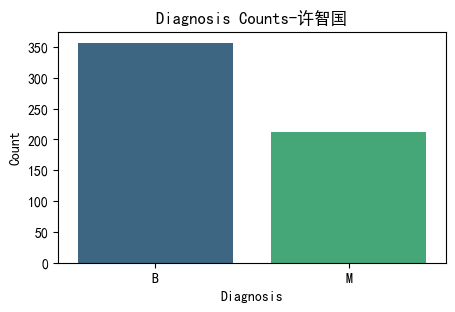

In [9]:
# 将diagnosis可视化为条形图
# 设置图形的大小
plt.figure(figsize=(5, 3))
# 绘制条形图，x和y分别指定了x轴和y轴的变量类别，data指定了dataframe(数据源)，palette是调色板，指定了颜色方案
sns.barplot(x='diagnosis', y='count', data=diagnosis, palette='viridis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
# 注意下面两行代码是表格标题中有中文时需要
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('Diagnosis Counts-许智国')
plt.show()

In [10]:
Dimensions = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].sum().reset_index()
Dimensions

,index,0
0,radius_mean,8038.429000
1,texture_mean,10975.810000
2,perimeter_mean,52330.380000
3,area_mean,372631.900000
4,smoothness_mean,54.829000
5,compactness_mean,59.370020
6,concavity_mean,50.526811
7,concave points_mean,27.834994
8,symmetry_mean,103.081100
9,fractal_dimension_mean,35.731840


In [11]:
Dimensions.rename(columns={
    'index' : 'Dimensions', 0 : 'Sum'
},inplace=True)

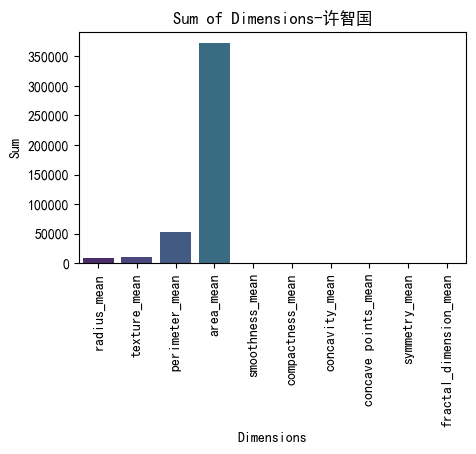

In [12]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Dimensions', y='Sum', data=Dimensions, palette='viridis')
plt.xlabel('Dimensions')
# x轴的标签旋转角度
plt.xticks(rotation=90)
plt.ylabel('Sum')
plt.title('Sum of Dimensions-许智国')
plt.show()

In [13]:
Properties = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']].sum().reset_index()
Properties.rename(columns={
    'index' : 'Properties', 0 : 'Sum'
},inplace=True)
Properties

,Properties,Sum
0,radius_se,230.542900
1,texture_se,692.389600
2,perimeter_se,1630.787700
3,area_se,22951.798000
4,smoothness_se,4.006317
5,compactness_se,14.497061
6,concavity_se,18.147525
7,concave points_se,6.712002
8,symmetry_se,11.688568
9,fractal_dimension_se,2.159300


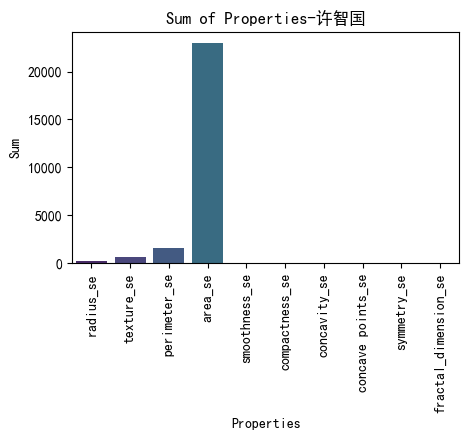

In [14]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Properties', y='Sum', data=Properties, palette='viridis')
plt.xlabel('Properties')
plt.xticks(rotation=90)
plt.ylabel('Sum')
plt.title('Sum of Properties-许智国')
plt.show()

In [15]:
The_worst_dimensions = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].sum().reset_index()
The_worst_dimensions.rename(columns={
    'index' : 'The_worst_dimensions', 0 : 'Sum'
},inplace=True)
The_worst_dimensions

,The_worst_dimensions,Sum
0,radius_worst,9257.169000
1,texture_worst,14610.340000
2,perimeter_worst,61031.630000
3,area_worst,501051.800000
4,smoothness_worst,75.317730
5,compactness_worst,144.676810
6,concavity_worst,154.875247
7,concave points_worst,65.210941
8,symmetry_worst,165.053000
9,fractal_dimension_worst,47.765170


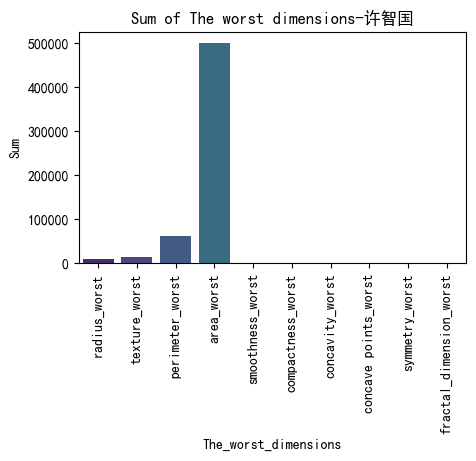

In [16]:
plt.figure(figsize=(5, 3))
sns.barplot(x='The_worst_dimensions', y='Sum', data=The_worst_dimensions, palette='viridis')
plt.xlabel('The_worst_dimensions')
plt.xticks(rotation=90)
plt.ylabel('Sum')
plt.title('Sum of The worst dimensions-许智国')
plt.show()

# <font face="微软雅黑"><font color=#FF000 >Correlation Matrix</font>

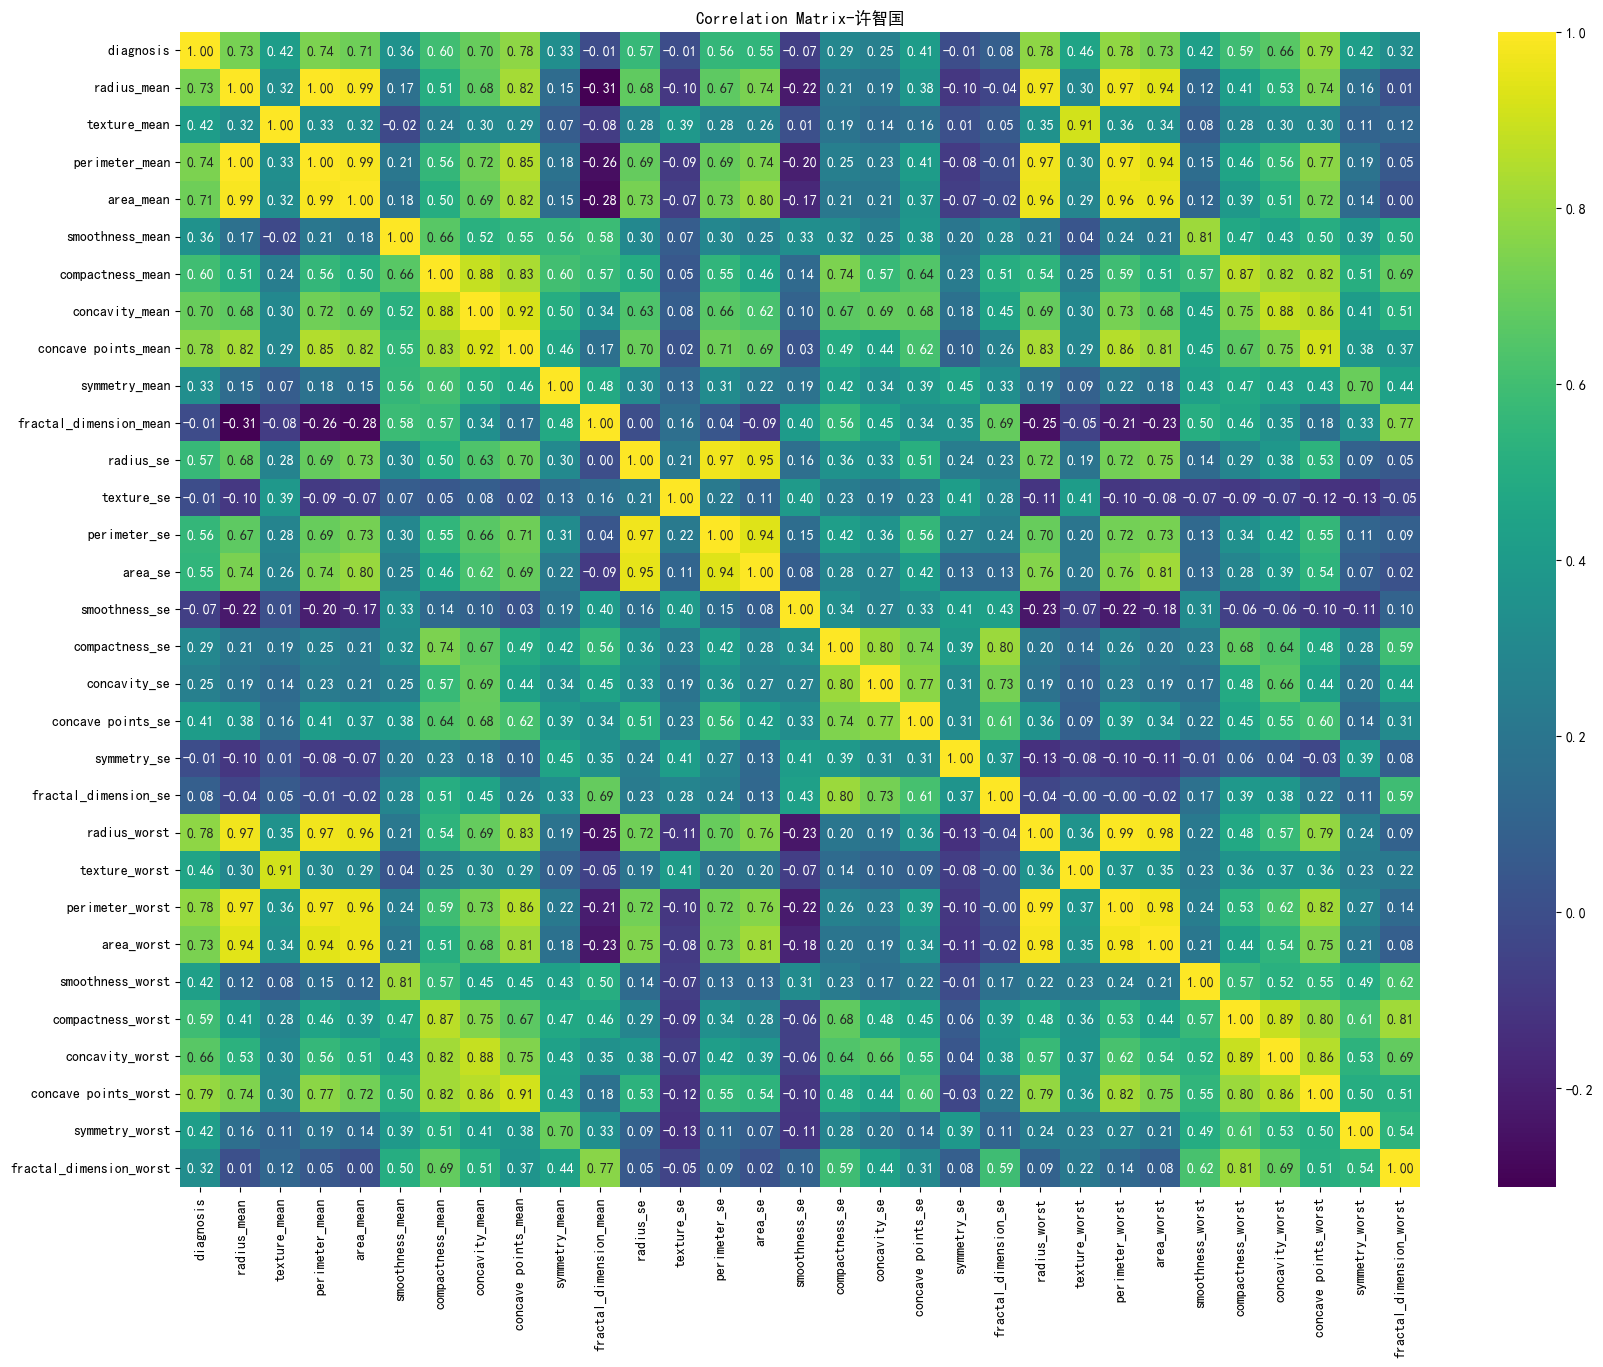

In [17]:
# 将分类的标签类别转换为数值格式。
labelencoder = LabelEncoder()
# fit函数拟合数据，根据内部参数转换数据
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
plt.figure(figsize=(20, 15))
# corr方法返回Dataframe中每一对数值列之间的皮尔逊相关系数,annot返回相关系数的显示，fmt保留两位小数的浮点数
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix-许智国')
plt.show()

# <font face="微软雅黑"><font color=#FF000 >Train Test Split</font>

In [18]:
# 把diagnosis一列分离出来
X = df.drop(columns='diagnosis',axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
Y = df['diagnosis']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [20]:
# 将数据集分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [22]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.2687,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.3791,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.13760,0.1611,0.10950,0.2722,0.06956
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830


In [23]:
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int32

In [24]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int32

# <font face="微软雅黑"><font color=#FF000 >Build the Model</font>

In [25]:
# 标准化数据，移除了数据的均值，并将其缩放到单位方差中
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [26]:
x_train

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

In [27]:
x_test

array([[-0.44180872, -0.22163893, -0.42004481, ..., -0.21335976,
         0.11865301,  0.13539217],
       [ 1.40986153,  0.38303372,  1.32877902, ...,  0.89553559,
        -0.64528246, -0.98835798],
       [ 0.41390906, -0.02528766,  0.42783237, ...,  0.50154822,
        -0.17339144, -0.24473803],
       ...,
       [-1.17618057, -0.34212721, -1.09842884, ..., -0.24774412,
        -0.54133444,  1.62783221],
       [-0.05544785,  1.09257579,  0.04235885, ...,  0.51157699,
         1.16968301,  1.73703514],
       [-0.32160756, -1.22347664, -0.26124782, ...,  0.56888424,
        -0.50008522,  1.71103444]])

# <font face="微软雅黑"><font color=#FF000 >SVC</font>

<font face="楷体">
SVM，也就是Support Vector Machine，支持向量机算法，根据解决问题的不同，分为SVC(分类)和SVR(回归)。
</font>

In [28]:
svc = SVC()
# 使用SVC算法训练数据集
svc.fit(x_train,y_train)

SVC()

In [29]:
# 对训练集模型进行评估
svc.score(x_train,y_train)

0.9874371859296482

In [30]:
# 对测试集模型进行评估
svc.score(x_test,y_test)

0.9824561403508771

In [31]:
# 测试结果的输出
y_pred = svc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

Text(0.5, 1.0, 'heatmap-许智国')

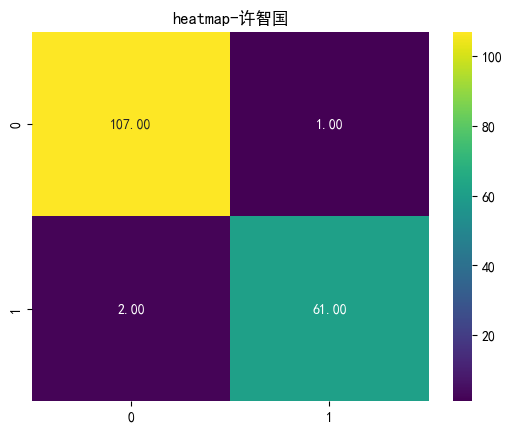

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='viridis', fmt=".2f")
plt.title('heatmap-许智国')

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# <font face="微软雅黑"><font color=#FF000 >ROC Curves Comparison</font>

In [34]:
# 对基于机器学习多种算法实现的模型

# 支持向量机
model1 = SVC()
# 使用SVC算法训练数据集
model1.fit(x_train,y_train)

# 人工神经网络
model2 = Sequential([
    Dense(16, activation='relu', input_dim=30),
    
    Dense(8, activation='relu'),
    
    Dense(1, activation='sigmoid')
])
#使用Adam优化器，二进制交叉熵作为损失函数，以及准确率作为评估指标
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=200, validation_split=0.2)

# 逻辑回归
model3 = LogisticRegression()
model3.fit(x_train,y_train)

# KNN
model4 = KNeighborsClassifier(n_neighbors=9)
model4.fit(x_train,y_train)

# 随机森林
# 初始化随机森林分类器
model5 = RandomForestClassifier()
# 训练模型
model5.fit(x_train, y_train)

# 决策树
# 创建决策树分类器对象
model6 = DecisionTreeClassifier()
model6.fit(x_train, y_train)

Epoch 1/200
10/10 [==============================] - 1s 43ms/step - loss: 0.6782 - accuracy: 0.4811 - val_loss: 0.6875 - val_accuracy: 0.4750
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.5409 - val_loss: 0.5894 - val_accuracy: 0.5125
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4924 - accuracy: 0.6384 - val_loss: 0.5167 - val_accuracy: 0.5875
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4262 - accuracy: 0.7327 - val_loss: 0.4568 - val_accuracy: 0.7000
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8333 - val_loss: 0.4063 - val_accuracy: 0.8000
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8836 - val_loss: 0.3531 - val_accuracy: 0.8375
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.9057 - val_loss: 0.2887 - val_accuracy: 0.9125
Epoch 8/200


DecisionTreeClassifier()

6/6 [==============================] - 0s 3ms/step


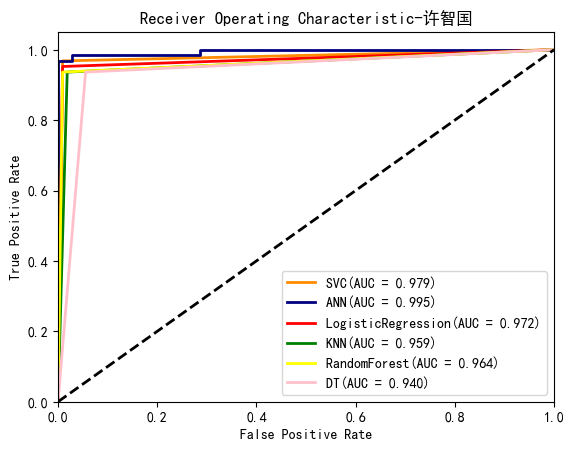

In [35]:
os.environ['OMP_NUM_THREADS'] = '6'
# 模型整合对比
models = [model1,model2,model3,model4,model5,model6]
roc_=[]
name=['SVC','ANN','LogisticRegression','KNN','RandomForest','DT']
color=["darkorange","navy","red","green","yellow","pink"]
for model in models:
    # 预测测试集的概率
    y_pred_prob = model.predict(x_test)
    # 大于1的概率提取
    y_pred = (y_pred_prob > 0.5).astype("int32")
    # 计算ROC曲线和AUC值
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_.append([fpr, tpr, roc_auc])
# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(roc_[0][0], roc_[0][1], color=color[0], lw=lw, label= name[0]+'(AUC = %0.3f)' % roc_[0][2]) 
plt.plot(roc_[1][0], roc_[1][1], color=color[1], lw=lw, label= name[1]+'(AUC = %0.3f)' % roc_[1][2]) 
plt.plot(roc_[2][0], roc_[2][1], color=color[2], lw=lw, label= name[2]+'(AUC = %0.3f)' % roc_[2][2]) 
plt.plot(roc_[3][0], roc_[3][1], color=color[3], lw=lw, label= name[3]+'(AUC = %0.3f)' % roc_[3][2])
plt.plot(roc_[4][0], roc_[4][1], color=color[4], lw=lw, label= name[4]+'(AUC = %0.3f)' % roc_[4][2]) 
plt.plot(roc_[5][0], roc_[5][1], color=color[5], lw=lw, label= name[5]+'(AUC = %0.3f)' % roc_[5][2]) 
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-许智国')
plt.legend(loc="lower right")
plt.show()